# Guillaume Payeur (260929164)

#### Note to grader: all the code explanations and figures are included in this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import interpolate
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
plt.rcParams.update({"text.usetex": True})

# Q1

We find expressions for the error on the numerical derivatives computed using $f(x\pm\delta)$ and using $f(x\pm2\delta)$. For $f(x\pm\delta)$ we have
\begin{align}
    &f'(x) = \frac{f(x+\delta)-f(x-\delta)}{2\delta}\\
    &=\frac{(f(x)+f'(x)\delta+\frac{1}{2}f''(x)\delta^2 + \dots)(1+\epsilon g_0)-(f(x)-f'(x)\delta+\frac{1}{2}f''(x)\delta^2 - \dots)(1+\epsilon g_1)}{2\delta}\\
    &= f'(x) + \frac{f(x)\epsilon + \frac{1}{3}f'''(x)\delta^3+\frac{1}{60}f^{(5)}(x)\delta^5}{2\delta}
\end{align}
so the error on the derivative is (ignoring negligible terms)
\begin{align}
    E = \frac{1}{2}\frac{f\epsilon}{\delta}+\frac{1}{6}f'''\delta^2+\frac{1}{120}f^{(5)}\delta^4
\end{align}
Doing the same for $f(x\pm2\delta)$ we get that the error is
\begin{align}
    E = \frac{1}{4}\frac{f\epsilon}{\delta}+\frac{2}{3}f'''\delta^2+\frac{2}{15}f^{(5)}\delta^4
\end{align}
What we want is to take a combination of the two computed derivatives that cancels off the the $f'''$ term in the errors. That combination is 
\begin{align}
    f'(x) = \frac{1}{3}\Big(4\Big(\frac{f(x+\delta)-f(x-\delta)}{2\delta}\Big)-\Big(\frac{f(x+2\delta)-f(x-2\delta)}{4\delta}\Big)\Big)
\end{align}
in which case the error is
\begin{align}
    E\sim\frac{f\epsilon}{\delta}+f^{(5)}\delta^4
\end{align}
Minimizing with respect to $\delta$ we get that the optimal $\delta$ is
\begin{align}
    \boxed{\delta = \Big(\frac{f\epsilon}{f^{(5)}}\Big)^{1/4}}
\end{align}

In [2]:
# Numerical derivative
def num_derivative(a,x,delta):
    # derivative using f(x +/- delta)
    f_prime_1 = (np.exp(a*(x+delta))-np.exp(a*(x-delta)))/(2*delta)
    # derivative using f(x +/- 2delta)
    f_prime_2 = (np.exp(a*(x+2*delta))-np.exp(a*(x-2*delta)))/(4*delta)
    return (4*f_prime_1-f_prime_2)/3

# Analytic (true) derivative
def true_derivative(a,x):
    return a*np.exp(a*x)

Testing for $f(x)=e^x$ at $x=0$. Here we can assume $f \sim f^{(5)}$ and the boxed equation for optimal $\delta$ gives
\begin{align}
    \delta = \Big(10^{-16}\Big)^{1/4} = 10^{-4}
\end{align}

In [3]:
x=0
a=1
delta_array = 10**(np.linspace(-8,0,100))
error_array = np.zeros_like(delta_array)
for i in range(delta_array.shape[0]):
    error_array[i] = np.abs(num_derivative(a,x,delta_array[i])-true_derivative(a,x))

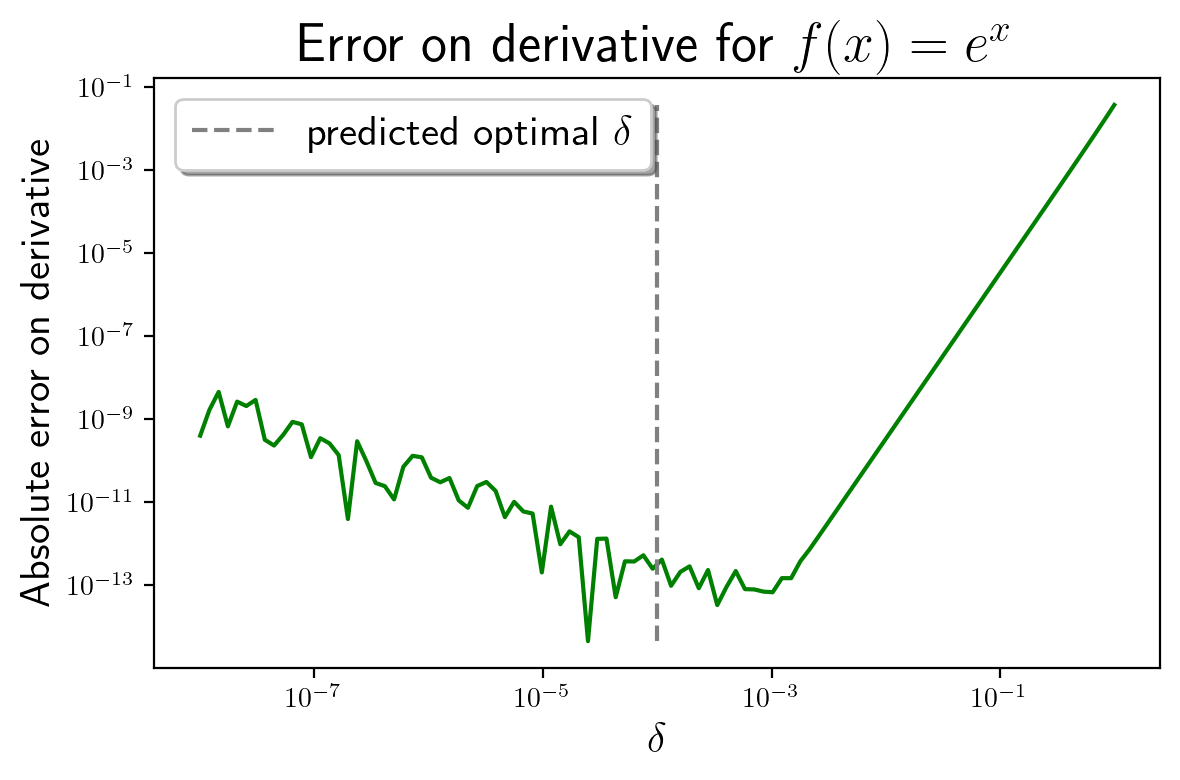

In [4]:
plt.plot(delta_array,error_array,color='green')
plt.plot([1e-4,1e-4],[error_array.min(),error_array.max()],ls='--',color='gray',label='predicted optimal $\delta$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta$',fontsize=15)
plt.ylabel('Absolute error on derivative',fontsize=15)
plt.title('Error on derivative for $f(x)=e^x$',fontsize=20)
plt.legend(loc=0,frameon=True,shadow=True,fontsize=15)
plt.tight_layout()

Testing for $f(x)=e^{0.01x}$ at $x=0$. Here we can assume $f \sim 10^2 f^{(5)}$ and the boxed equation for optimal $\delta$ gives
\begin{align}
    \delta = \Big(10^{-16}(10^{2})^5\Big)^{1/4} = 10^{-3/2}
\end{align}

In [5]:
x=1
a=0.01
delta_array = 10**(np.linspace(-8,0,100))
error_array = np.zeros_like(delta_array)
for i in range(delta_array.shape[0]):
    error_array[i] = np.abs(num_derivative(a,x,delta_array[i])-true_derivative(a,x))

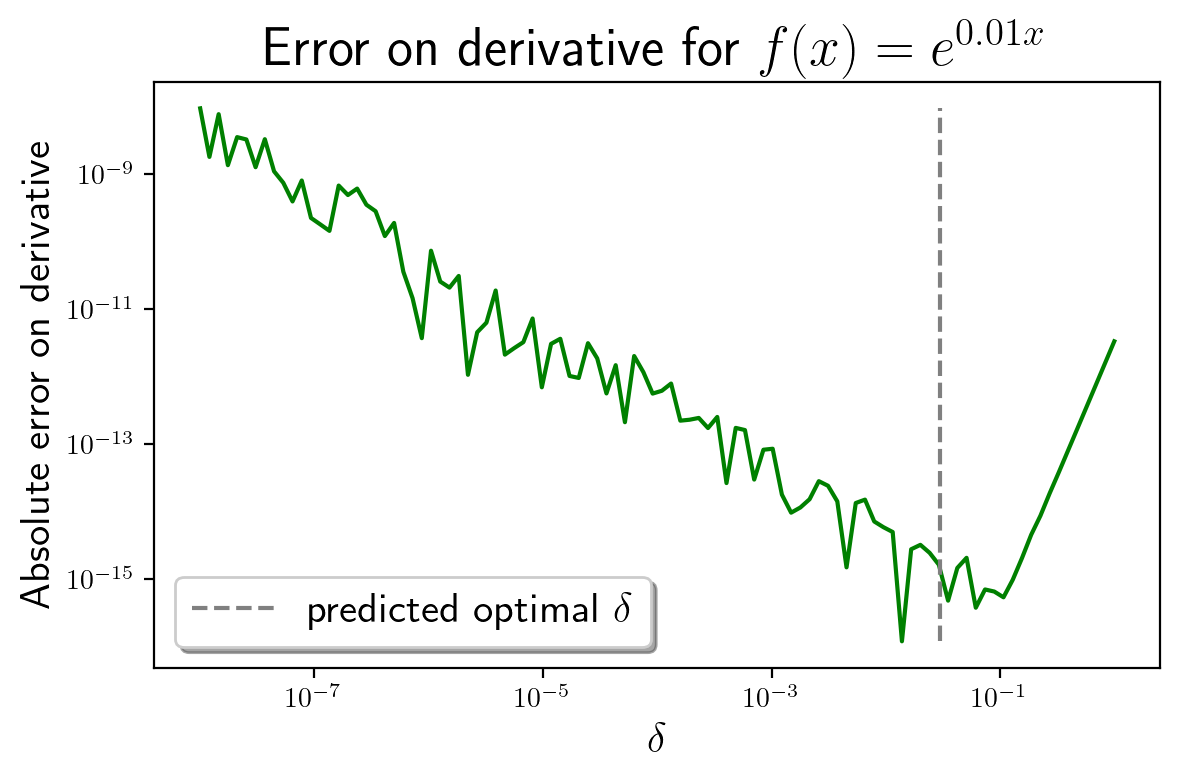

In [6]:
plt.plot(delta_array,error_array,color='green')
plt.plot([0.03,0.03],[error_array.min(),error_array.max()],ls='--',color='gray',label='predicted optimal $\delta$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta$',fontsize=15)
plt.ylabel('Absolute error on derivative',fontsize=15)
plt.title('Error on derivative for $f(x)=e^{0.01x}$',fontsize=20)
plt.legend(loc=0,frameon=True,shadow=True,fontsize=15)
plt.tight_layout()

The agreement between predictions and observations isn't stellar but that's because I've made big approximations when calculating the interpolation error: I assumed that all coefficients in the expression for $E$ are 1.

# Q2

In order to find the optimal $\delta$ to minimize the error on the derivative, we need an estimate for $(f/f''')$, so we need to compute an estimate of the third derivative. We can do this by calculating
\begin{align}
    f'''(x) &= \frac{1}{2\delta}(f''(x+\delta)-f''(x-\delta))
\end{align}
now plugging in 
\begin{align}
    f''(x) &= \frac{1}{2\delta}(f'(x+\delta)-f'(x-\delta))
\end{align}
and then plugging in
\begin{align}
    f'(x) &= \frac{1}{2\delta}(f(x+\delta)-f(x-\delta))
\end{align}
we get
\begin{align}
    f'''(x)=\frac{1}{2\delta}(f(x+3\delta)-3f(x+\delta)+3f(x-\delta)-f(x-3\delta))
\end{align}
So we use this equation with $\delta=10^{-5}$ (we don't care about $\delta$ so much here since we just care about the order of magnitude of $f'''$) and then use the equation derived in class, namely
\begin{align}
    \delta = \Big(\frac{\epsilon f}{f'''}\Big)^{1/3}
\end{align}
to find the optimal $\delta$. Then we compute the derivative via
\begin{align}
    f'(x) &= \frac{1}{2\delta}(f(x+\delta)-f(x-\delta))
\end{align}
We return this value of $f'(x)$ aswell as $\delta$ if requested. As for the size of the error, we learned in class that the error here is roughly
\begin{align}
    E = \frac{\epsilon f}{\delta}+2f'''\delta^2
\end{align}
and that's what we return as error estimate if requested.

In [7]:
def ndiff(fun,x,full=False):
    eps = 1e-16
    delta_f3 = 1e-5
    
    # Approximating third derivative
    f = fun(x)
    f3 = 1/(8*delta_f3**3)*(fun(x+3*delta_f3)-3*fun(x+delta_f3)+3*fun(x-delta_f3)-fun(x-3*delta_f3))
    delta = (f*eps/f3)**(1/3)
    
    # Calculating derivative
    f1 = 1/(2*delta)*(fun(x+delta)-fun(x-delta))
    err = eps*f/delta + 2*f3*delta**2
    
    if full:
        return f1,delta,err
    return f1

Now we just do a small test of ndiff. In each case, I take a derivative, and compare both the numerical derivative and the estimated error to the truth.

Testing with $f(x)=e^x$ and $x=0$

In [8]:
fun=np.exp
fprime,delta,e_fprime = ndiff(fun,0,full=True)
print('dx:',delta)
print('derivative:',fprime)
print('true derivative:', 1)
print('estimated error on derivative:',e_fprime)
print('true error on derivative:',np.abs(fprime-1))

dx: 4.621528465628242e-06
derivative: 1.0000000000030995
true derivative: 1
estimated error on derivative: 6.491358913640684e-11
true error on derivative: 3.099520640148512e-12


Testing with $f(x)=e^x$ and $x=1$

In [9]:
fun=np.exp
fprime,delta,e_fprime = ndiff(fun,1,full=True)
print('dx:',delta)
print('derivative:',fprime)
print('true derivative:', np.e)
print('estimated error on derivative:',e_fprime)
print('true error on derivative:',np.abs(fprime-np.e))

dx: 4.739350250110249e-06
derivative: 2.71828182848983
true derivative: 2.718281828459045
estimated error on derivative: 1.7206674027072477e-10
true error on derivative: 3.078470811601619e-11


Testing with $f(x)=e^{0.1x}$ and $x=0$

In [10]:
def fun(x):
    return np.e**(0.1*x)
fprime,delta,e_fprime = ndiff(fun,0,full=True)
print('dx:',delta)
print('derivative:',fprime)
print('true derivative:',0.1)
print('estimated error on derivative:',e_fprime)
print('true error on derivative:',np.abs(fprime-0.1))

dx: 1.2167646631985893e-05
derivative: 0.10000000000403747
true derivative: 0.1
estimated error on derivative: 2.4655548363096828e-11
true error on derivative: 4.03746480692746e-12


Testing with $f(x)=e^{0.1x}$ and $x=1$

In [11]:
def fun(x):
    return np.e**(0.1*x)
fprime,delta,e_fprime = ndiff(fun,1,full=True)
print('dx:',delta)
print('derivative:',fprime)
print('true derivative:',0.1*np.e**0.1)
print('estimated error on derivative:',e_fprime)
print('true error on derivative:',np.abs(fprime-0.1*np.e**0.1))

dx: 1.5849895500790092e-05
derivative: 0.11051709180254779
true derivative: 0.11051709180756478
estimated error on derivative: 2.0918199454764066e-11
true error on derivative: 5.01698682597862e-12


The estimates of the derivative are good and so are the estimates of the error, so this worked!

# Q3

Since we are given $dV/dT$, and since the intervals between the data points are quite small, I do a linear interpolation from the data point closest to the value of V requested, that is, I compute
\begin{align}
 T(V) = T(V_0) + \frac{dT}{dV}(V-V_0)
\end{align}
As for the error, I observe that the values of $dV/dT$ are accurate to roughly a part in 100 (based on significant figures), so I approximate the error on the slope as being 
\begin{align}
 \delta(dT/dV) =  \frac{1}{100}\frac{dT}{dV}
\end{align}
and get my approximate error on $T(V)$ by propagating the error on the slope to $T(V)$. I get
\begin{align}
 \delta(T(V)) = \frac{1}{100}\frac{dT}{dV}(V-V_0)
\end{align}

Let's begin by plotting the raw data

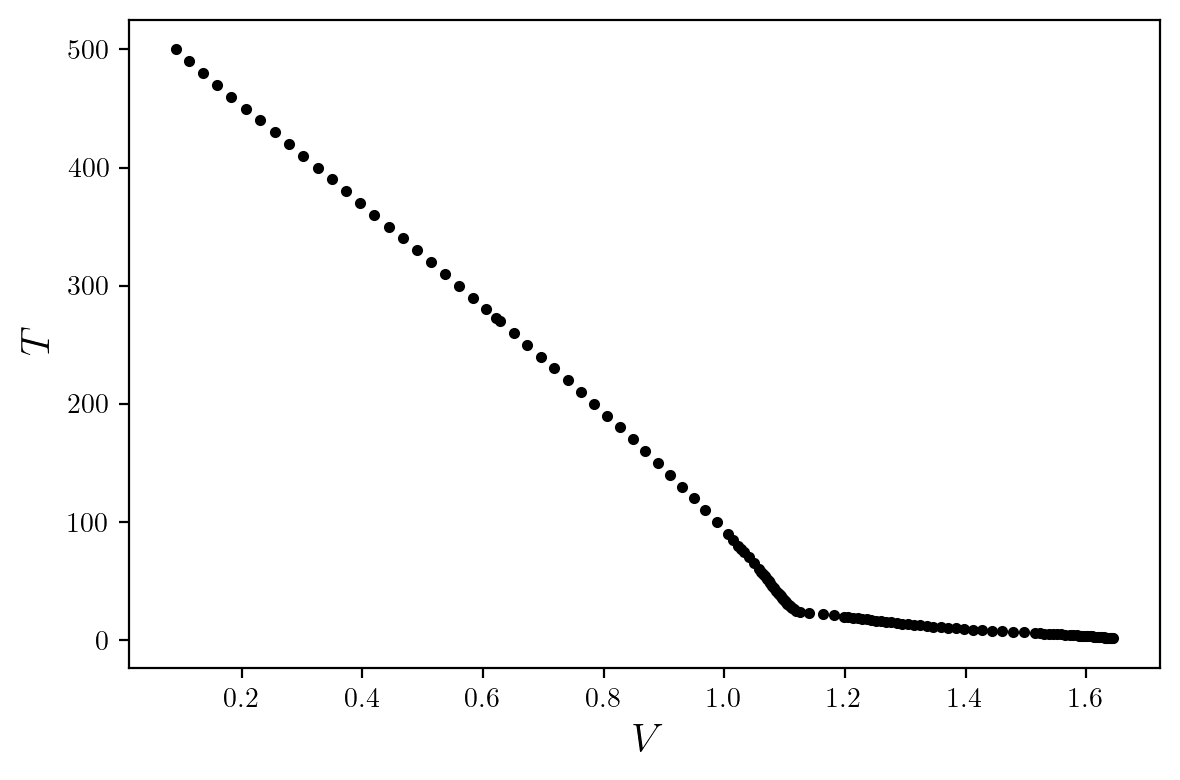

In [12]:
# Plotting the raw data
dat=np.loadtxt('lakeshore.txt')
V = dat[:,1]
T = dat[:,0]
plt.plot(V,T,lw=0,marker='.',color='black')
plt.xlabel('$V$',fontsize=15)
plt.ylabel('$T$',fontsize=15)
plt.tight_layout()

In [13]:
def lakeshore(V,data):
    # Extracting the Voltage, Temperature, derivative of Temperature wrt Voltage
    data_V = data[:,1]
    data_T = data[:,0]
    data_dTdV = 1000/data[:,2]
    
    # Making arrays that will contain the interpolated temperatures and errors
    T_interp = np.zeros_like(V)
    e_T_interp = np.zeros_like(V)
    
    for i in range(V.shape[0]):
        # Extracting the Voltage, Temperature, derivative of Temperature wrt Voltage
        data_V = data[:,1]
        data_T = data[:,0]
        data_dTdV = 1000/data[:,2]

        # If the requested value of V requires extrapolation, give a warning and return a NAN
        V_max = data_V[0]
        V_min = data_V[-1]
        if V[i] > V_max or V[i] < V_min:
            warnings.warn('A value of V requested is not withing the range of data recorded, extrapolation required')
            return np.nan,np.nan

        # Finding the index of Voltage data point closest to V
        V_right = np.where(data_V<V[i])[0][0]
        V_left = np.where(data_V>V[i])[0][-1]
        if np.abs(V_left-V[i]) < np.abs(V_right-V[i]):
            V_index = V_left
        else:
            V_index = V_right

        # Now doing the linear interpolation
        T_interp[i] = data_T[V_index] + data_dTdV[V_index]*(V[i]-data_V[V_index])

        # Getting the error estimate
        e_T_interp[i] = (data_dTdV[V_index]/100)*(V[i]-data_V[V_index])

    # Returning the interpolated value and error
    return T_interp, e_T_interp

Now I do a quick test where I evaluate T(V=0.5).

In [14]:
data=np.loadtxt('lakeshore.txt')
lakeshore(np.array([0.5]),data)

(array([325.75905172]), array([0.05759052]))

I plot T(V=0.5) along with neighboring points to check that it worked

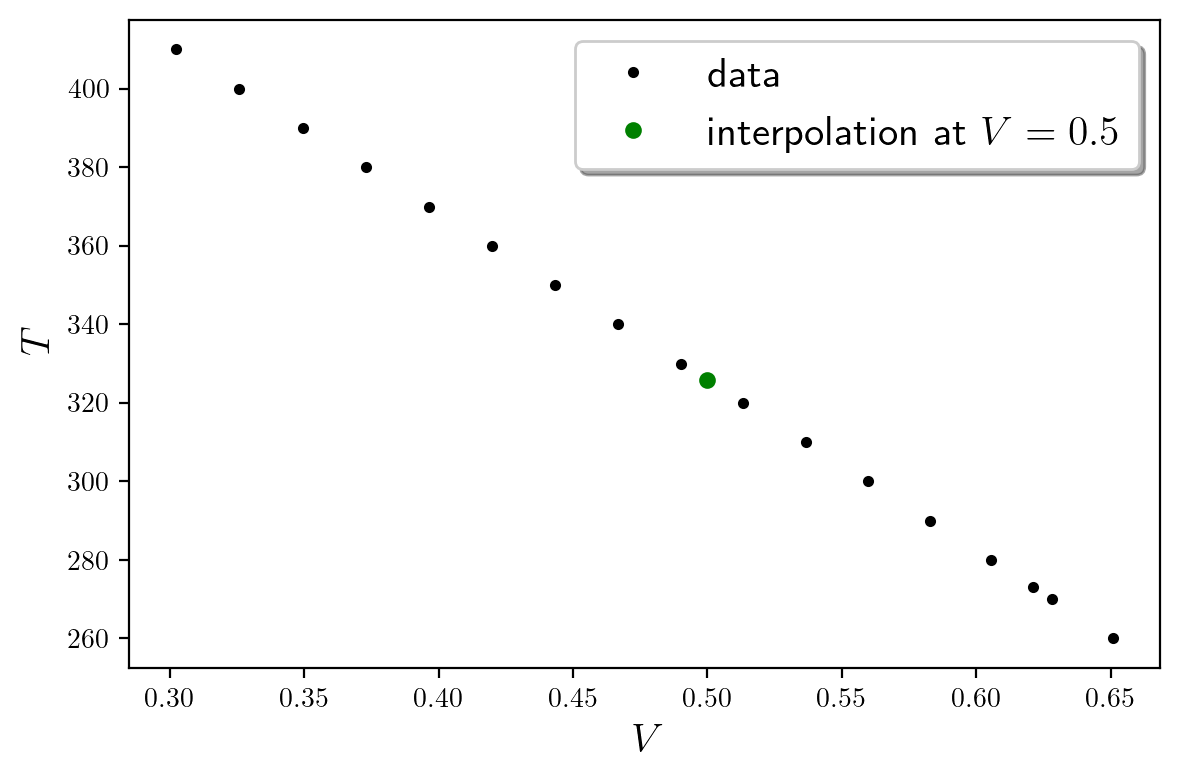

In [15]:
data=np.loadtxt('lakeshore.txt')
V=np.array([0.5])
T_interp,e_T_interp = lakeshore(V,data)
T_interp = T_interp[0]
e_T_interp[0]

plt.plot(data[118:135,1],data[118:135,0],lw=0,marker='.',label='data',color='black')
plt.plot(V,T_interp,marker='.',color='green',ms=10,lw=0,label='interpolation at $V=0.5$')
plt.legend(loc=0,frameon=True,shadow=True,fontsize=15)
plt.xlabel('$V$',fontsize=15)
plt.ylabel('$T$',fontsize=15)
plt.tight_layout()

And just as proof that my function can take in an array of $V$:

In [16]:
data=np.loadtxt('lakeshore.txt')
lakeshore(np.array([0.5,0.8]),data)

(array([325.75905172, 192.44953271]), array([0.05759052, 0.02449533]))

# Q4

I adapt code from Professor Sievers to do polynomial interpolations, cubic spline interplations, and rational fits. I take the function $f(x)=cos(x)$ with $13$ points uniformly sampled from the inverval$(-\pi/2,\pi/2)$.

Then I make a plot of the absolute interpolation error from all three approaches

In [17]:
xi=np.linspace(-np.pi/2,np.pi/2,13)
yi=np.cos(xi)

x=np.linspace(xi[1],xi[-2],1001)
y_true=np.cos(x)

# Polynomial (cubic) interpolation
def poly(xi,yi,x):
    y_interp_poly=np.zeros(len(x))
    for i in range(len(x)):    
        ind=np.max(np.where(x[i]>=xi)[0])
        x_use=xi[ind-1:ind+3]
        y_use=yi[ind-1:ind+3]
        pars=np.polyfit(x_use,y_use,3)
        pred=np.polyval(pars,x[i])
        y_interp_poly[i]=pred
        
    return y_interp_poly
    
# Cubic spline
def spline(xi,yi,x):
    spln=interpolate.splrep(xi,yi)
    y_interp_spline=interpolate.splev(x,spln)
    
    return y_interp_spline

# Rational fit
def rat(xi,yi,x):
    n=int((xi.shape[0]-1)/2)
    m=n

    pcols=[xi**k for k in range(n+1)]
    pmat=np.vstack(pcols)

    qcols=[-xi**k*yi for k in range(1,m+1)]
    qmat=np.vstack(qcols)
    mat=np.hstack([pmat.T,qmat.T])
    coeffs=np.linalg.inv(mat)@yi

    num=np.polyval(np.flipud(coeffs[:n+1]),x)
    denom=1+x*np.polyval(np.flipud(coeffs[n+1:]),x)
    y_interp_rat=num/denom
    
    return y_interp_rat

y_interp_poly, y_interp_spline, y_interp_rat = poly(xi,yi,x), spline(xi,yi,x), rat(xi,yi,x)

C:\Users\Guill\Anaconda3\envs\ml_pytorch\lib\site-packages\ipykernel_launcher.py:46: RankWarning: Polyfit may be poorly conditioned


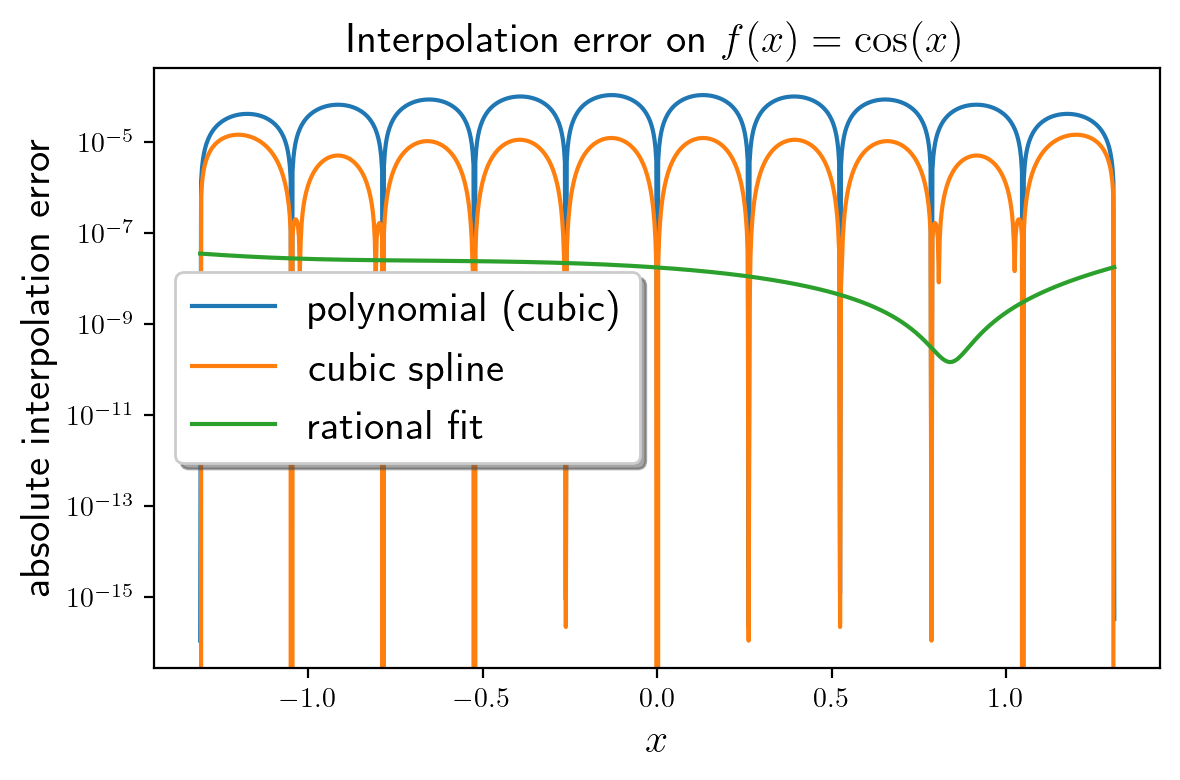

In [18]:
plt.clf()
plt.plot(x,np.abs(y_interp_poly-y_true),label='polynomial (cubic)')
plt.plot(x,np.abs(y_interp_spline-y_true),label='cubic spline')
plt.plot(x,np.abs(y_interp_rat-y_true),label='rational fit')
plt.yscale('log')
plt.xlabel('$x$',fontsize=15)
plt.ylabel('absolute interpolation error',fontsize=15)
plt.title('Interpolation error on $f(x)=\cos(x)$',fontsize=15)
plt.legend(loc=0,frameon=True,shadow=True,fontsize=15)
plt.tight_layout()

What we see is that the rational fit was the most succesful by far, followed by the cubic spline. 

Now I change the function to $f(x)=\frac{1}{1+x^2}$ and do the same thing, this time with $5$ points in the interval $(-1,1)$

In [19]:
xi=np.linspace(-1,1,5)
yi=1/(1+xi**2)

x=np.linspace(xi[1],xi[-2],1001)
y_true=1/(1+x**2)

y_interp_poly, y_interp_spline, y_interp_rat = poly(xi,yi,x), spline(xi,yi,x), rat(xi,yi,x)

C:\Users\Guill\Anaconda3\envs\ml_pytorch\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


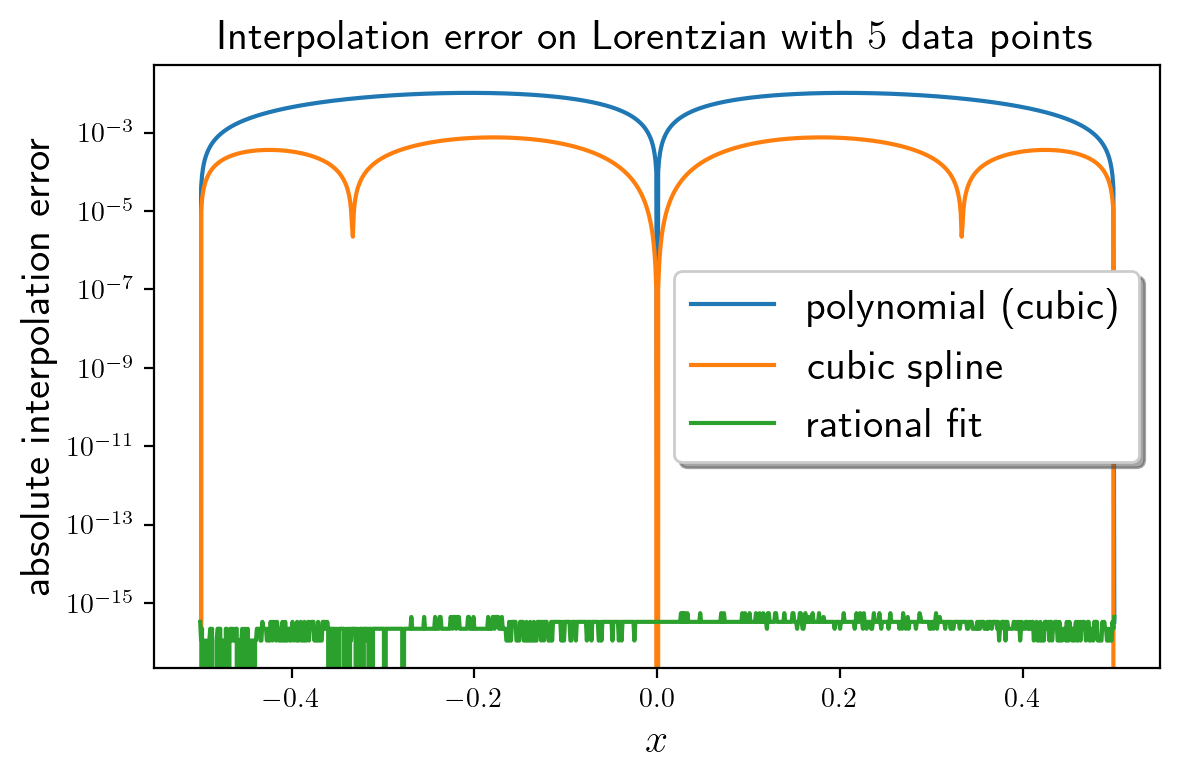

In [20]:
plt.clf()
plt.plot(x,np.abs(y_interp_poly-y_true),label='polynomial (cubic)')
plt.plot(x,np.abs(y_interp_spline-y_true),label='cubic spline')
plt.plot(x,np.abs(y_interp_rat-y_true),label='rational fit')
plt.yscale('log')
plt.xlabel('$x$',fontsize=15)
plt.ylabel('absolute interpolation error',fontsize=15)
plt.title('Interpolation error on Lorentzian with $5$ data points',fontsize=15)
plt.legend(loc=0,frameon=True,shadow=True,fontsize=15)
plt.tight_layout()

As expected the error on the rational fit is roughly machine precision ($\sim10^{-16}$) which was expected since the rational function can in principle fit the Lorentzian exactly (zero error). The cubic spline performs second best again.

Now I increase the number of points to 11 and see that the rational fit fails

In [21]:
xi=np.linspace(-1,1,11)
yi=1/(1+xi**2)

x=np.linspace(xi[1],xi[-2],1001)
y_true=1/(1+x**2)

# Rational fit (modified to print p,q, and the determinant of the matrix we're inverting)
def rat(xi,yi,x):
    n=int((xi.shape[0]-1)/2)
    m=n

    pcols=[xi**k for k in range(n+1)]
    pmat=np.vstack(pcols)

    qcols=[-xi**k*yi for k in range(1,m+1)]
    qmat=np.vstack(qcols)
    mat=np.hstack([pmat.T,qmat.T])
    coeffs=np.linalg.inv(mat)@yi

    num=np.polyval(np.flipud(coeffs[:n+1]),x)
    denom=1+x*np.polyval(np.flipud(coeffs[n+1:]),x)
    y_interp_rat=num/denom
    
    print('p:',coeffs[:n+1])
    print('q:',coeffs[n+1:])
    print('determinant:',np.linalg.det(mat))
    
    return y_interp_rat

y_interp_poly, y_interp_spline, y_interp_rat = poly(xi,yi,x), spline(xi,yi,x), rat(xi,yi,x)

p: [ 3.4254269  16.          4.         -4.         -2.6467993  -2.18149787]
q: [ 4.  0. -1.  8. -8.]
determinant: 1.4333226137647608e-54


C:\Users\Guill\Anaconda3\envs\ml_pytorch\lib\site-packages\ipykernel_launcher.py:30: RankWarning: Polyfit may be poorly conditioned


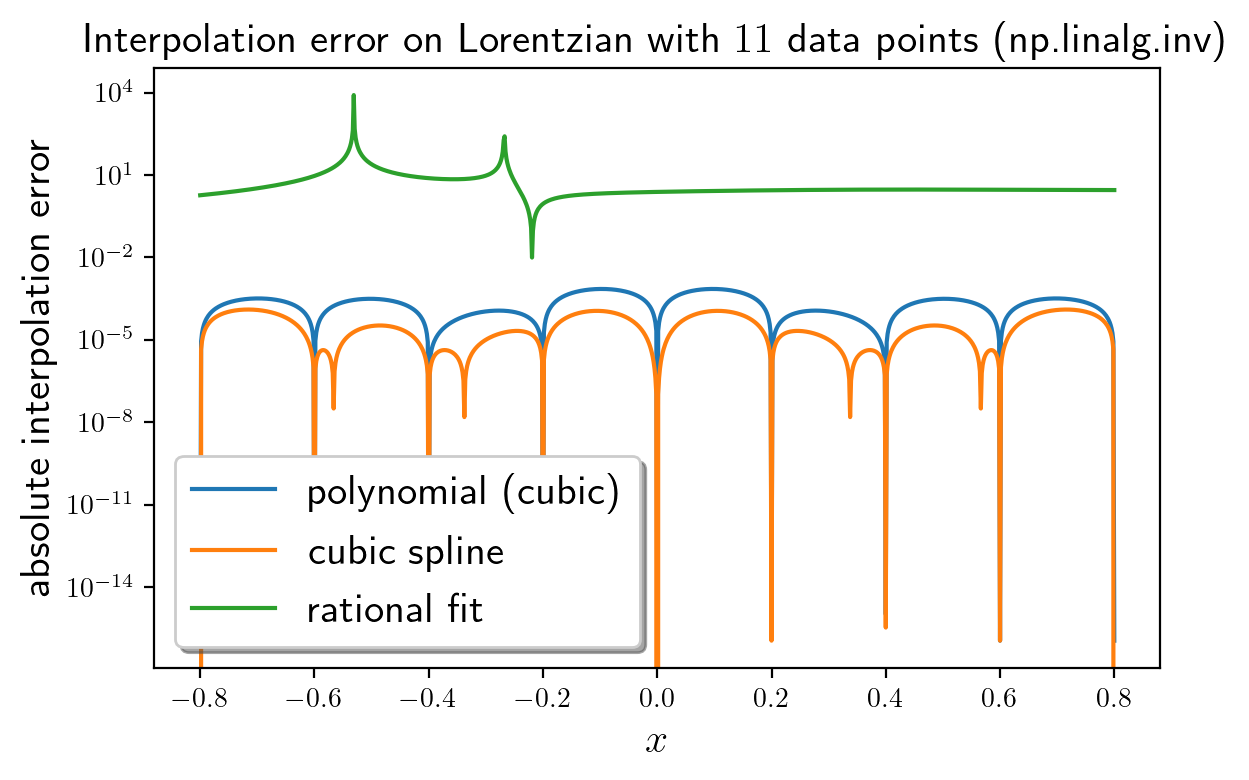

In [22]:
plt.clf()
plt.plot(x,np.abs(y_interp_poly-y_true),label='polynomial (cubic)')
plt.plot(x,np.abs(y_interp_spline-y_true),label='cubic spline')
plt.plot(x,np.abs(y_interp_rat-y_true),label='rational fit')
plt.yscale('log')
plt.xlabel('$x$',fontsize=15)
plt.ylabel('absolute interpolation error',fontsize=15)
plt.title('Interpolation error on Lorentzian with $11$ data points (np.linalg.inv)',fontsize=15)
plt.legend(loc=0,frameon=True,shadow=True,fontsize=15)
plt.tight_layout()

This is because the matrix we are inverting is almost singular (its determinant is $\sim10^{-54}$ as printed above) and np.linalg.inv fails to take the inverse properly. Printing p and q as above we see that they have not been set to their correct values. We should have had that p=(1,0,0,0,0,0) and q=(0,1,0,0,0) because corresponds identically the lorentzian.

But np.linalg.pinv is more stable and we can find the inverse correctly. So here I change np.linalg.inv to np.linalg.pinv and see that the rational fit performs as expected again.

In [23]:
xi=np.linspace(-1,1,11)
yi=1/(1+xi**2)

x=np.linspace(xi[1],xi[-2],1001)
y_true=1/(1+x**2)

# Rational fit (modified to use np.linalg.pinv instead of np.linalg.inv)
def rat(xi,yi,x):
    n=int((xi.shape[0]-1)/2)
    m=n

    pcols=[xi**k for k in range(n+1)]
    pmat=np.vstack(pcols)

    qcols=[-xi**k*yi for k in range(1,m+1)]
    qmat=np.vstack(qcols)
    mat=np.hstack([pmat.T,qmat.T])
    coeffs=np.linalg.pinv(mat)@yi

    num=np.polyval(np.flipud(coeffs[:n+1]),x)
    denom=1+x*np.polyval(np.flipud(coeffs[n+1:]),x)
    y_interp_rat=num/denom
    
    return y_interp_rat

y_interp_poly, y_interp_spline, y_interp_rat = poly(xi,yi,x), spline(xi,yi,x), rat(xi,yi,x)

C:\Users\Guill\Anaconda3\envs\ml_pytorch\lib\site-packages\ipykernel_launcher.py:26: RankWarning: Polyfit may be poorly conditioned


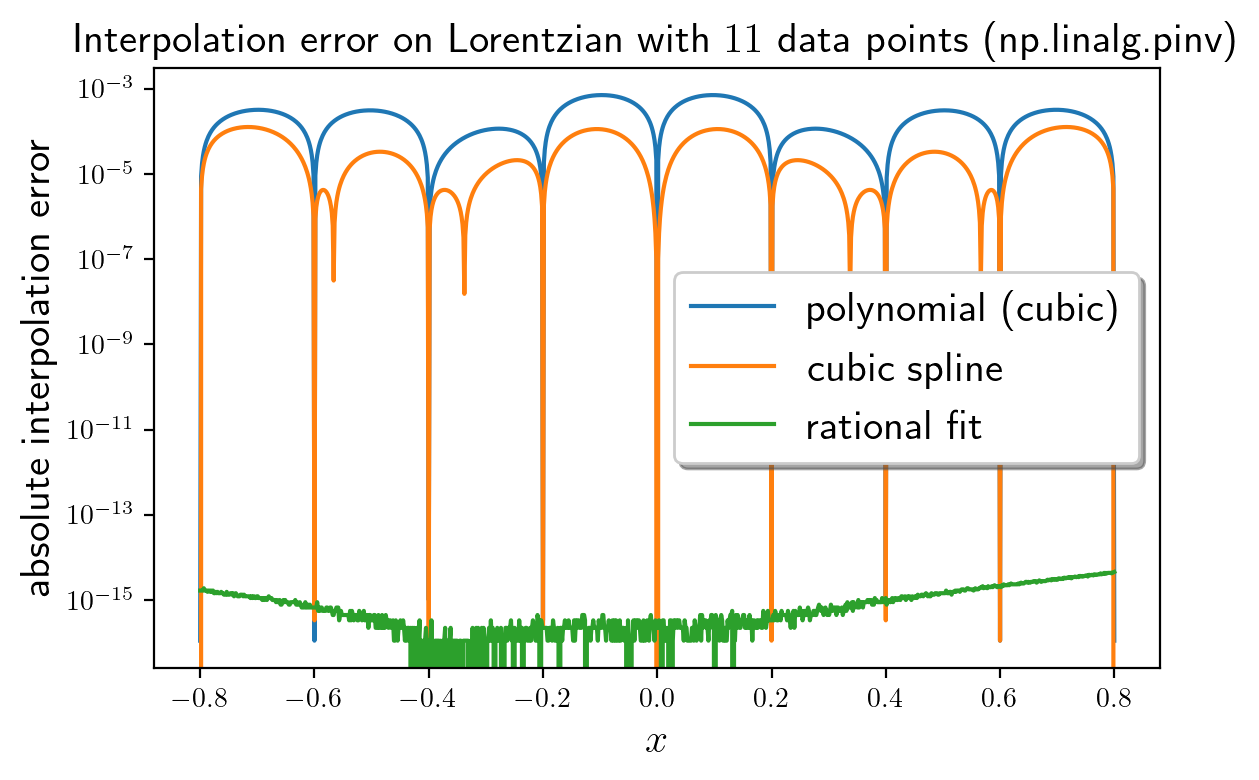

In [24]:
plt.clf()
plt.plot(x,np.abs(y_interp_poly-y_true),label='polynomial (cubic)')
plt.plot(x,np.abs(y_interp_spline-y_true),label='cubic spline')
plt.plot(x,np.abs(y_interp_rat-y_true),label='rational fit')
plt.yscale('log')
plt.xlabel('$x$',fontsize=15)
plt.ylabel('absolute interpolation error',fontsize=15)
plt.title('Interpolation error on Lorentzian with $11$ data points (np.linalg.pinv)',fontsize=15)
plt.legend(loc=0,frameon=True,shadow=True,fontsize=15)
plt.tight_layout()

The error on the rational fit is back to roughly machine precision, which is what was expected.